In [72]:
# 가우시안 rbf 모델을 이용한 SVM
from sklearn.svm import SVC
import mglearn
from mglearn.tools import make_handcrafted_dataset
from mglearn.plots import plot_2d_separator
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

X, y = make_handcrafted_dataset()

# 테스트셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 그리드 탐색으로 하이퍼파라미터 찾기
# 모델 선택(SVC)
svm = SVC()
values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'kernel': ['rbf'], 'C': values, 'gamma': values}  # rbf 커널

# 교차 검증을 위해
kfold = KFold(n_splits=10, shuffle=True, random_state=0) # stratified cross-validation

# 파라미터 추정
grid_search = GridSearchCV(svm, param_grid, cv=kfold)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [73]:
# 결과
print('최적 매개변수 점수 ==> {:.3f}'.format(grid_search.best_score_))
print('최적 매개변수 ==> {}'.format(grid_search.best_params_))
print('최적 매개변수의 테스트 점수 ==> {:.3f}'.format(grid_search.score(X_test, y_test)))
print('\n')

import pandas as pd

print('[best estimator] \n{}'.format(grid_search.best_estimator_))
print('\n')
cvres = grid_search.cv_results_
results = pd.DataFrame(cvres)
print('[result] \n{}'.format(results.head()))

최적 매개변수 점수 ==> 0.950
최적 매개변수 ==> {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
최적 매개변수의 테스트 점수 ==> 0.833


[best estimator] 
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[result] 
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.000600      0.000490         0.000500        0.000500   0.001   
1       0.000899      0.000300         0.000499        0.000499   0.001   
2       0.000799      0.000599         0.000900        0.000300   0.001   
3       0.000599      0.000489         0.000500        0.000500   0.001   
4       0.000700      0.000640         0.000499        0.000499   0.001   

  param_gamma param_kernel                                         params  \
0       0.001          rbf  {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}   
1        0.01     

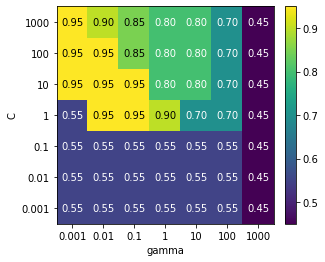

In [74]:
# 검색 결과를 heatmap으로 시각화
# heatmap으로 시각화하려면 각 parameter를 축으로 하는 numpy 배열을 만들어야 함
# 첫 번째는 7개의 grid(values)를 사용했으므로 cross-validation의 평균을 7x7 차원으로 변경
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable # colorbar의 크기를 정하기 위한 축 library

plt.rcParams['axes.unicode_minus'] = False 

# 차원 변형
mean_score = results['mean_test_score'].values.reshape(7, 7)

# 시각화
score_image = mglearn.tools.heatmap(mean_score, 
                                    xlabel='gamma',
                                    xticklabels=param_grid['gamma'],
                                    ylabel='C',
                                    yticklabels=param_grid['C'])

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad='5%')
plt.colorbar(score_image, cax=cax)
plt.show()

In [75]:
# 다시 한 번 파라미터 간격 조정 후 추정
# 이번에는 C와 gamma의 파라미터 간격을 분리
c_values2 = [0.5, 1, 5, 10, 50, 100]
g_values2 = [0.05, 0.1, 0.5, 1, 5, 10]
param_grid2 = {'kernel': ['rbf'], 'C': c_values2, 'gamma': g_values2}  # rbf 커널

# 교차 검증을 위해
kfold2 = KFold(n_splits=10, shuffle=True, random_state=0) # stratified cross-validation

# 파라미터 추정
grid_search2 = GridSearchCV(svm, param_grid2, cv=kfold2, scoring='accuracy', return_train_score=True)
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5, 1, 5, 10, 50, 100],
                         'gamma': [0.05, 0.1, 0.5, 1, 5, 10],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [76]:
# 결과
print('최적 매개변수 점수 ==> {:.3f}'.format(grid_search2.best_score_))
print('최적 매개변수 ==> {}'.format(grid_search2.best_params_))
print('최적 매개변수의 테스트 점수 ==> {:.3f}'.format(grid_search2.score(X_test, y_test)))
print('\n')

import pandas as pd

print('[best estimator] \n{}'.format(grid_search2.best_estimator_))
print('\n')
cvres2 = grid_search2.cv_results_
results2 = pd.DataFrame(cvres2)
print('[result2] \n{}'.format(results2.head()))

최적 매개변수 점수 ==> 0.950
최적 매개변수 ==> {'C': 0.5, 'gamma': 0.05, 'kernel': 'rbf'}
최적 매개변수의 테스트 점수 ==> 0.833


[best estimator] 
SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[result2] 
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.000700      0.000458         0.000599        0.000489     0.5   
1       0.000599      0.000489         0.000399        0.000489     0.5   
2       0.000400      0.000490         0.000400        0.000490     0.5   
3       0.000500      0.000500         0.000400        0.000490     0.5   
4       0.000100      0.000300         0.000100        0.000300     0.5   

  param_gamma param_kernel                                      params  \
0        0.05          rbf  {'C': 0.5, 'gamma': 0.05, 'kernel': 'rbf'}   
1         0.1      

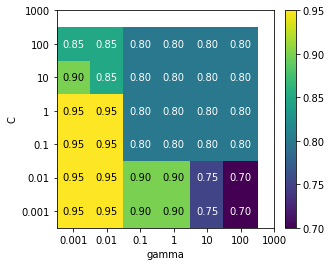

In [77]:
# 검색 결과를 heatmap으로 시각화
# heatmap으로 시각화하려면 각 parameter를 축으로 하는 numpy 배열을 만들어야 함
# 두 번째는 9개의 grid(values)를 사용했으므로 cross-validation의 평균을 7x7 차원으로 변경

# 차원 변형
mean_score = results2['mean_test_score'].values.reshape(6, 6)

# 시각화
score_image = mglearn.tools.heatmap(mean_score, 
                                    xlabel='gamma',
                                    xticklabels=param_grid['gamma'],
                                    ylabel='C',
                                    yticklabels=param_grid['C'])

ax2 = plt.gca()
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes('right', size='5%', pad='5%')
plt.colorbar(score_image, cax=cax2)
plt.show()

In [94]:
# 위의 그래프를 통해 C = 0.5, gamma = 0.05가 적당
svm = SVC(kernel='rbf', C=0.5, gamma=0.05)
svm.fit(X_train, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[[ 8.34468785  1.63824349]
 [ 8.7337095   2.49162431]
 [11.563957    1.3389402 ]
 [ 8.1062269   4.28695977]
 [ 9.50169345  1.93824624]
 [ 8.69289001  1.54322016]
 [ 8.68937095  1.48709629]
 [ 9.32298256  5.09840649]
 [ 7.99815287  4.8525051 ]
 [ 9.17748385  5.09283177]
 [ 8.34810316  5.13415623]
 [11.93027136  4.64866327]
 [ 8.67494727  4.47573059]
 [ 9.96346605  4.59676542]]


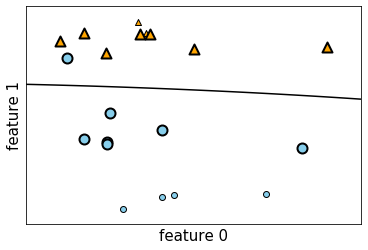

In [95]:
import numpy as np

plot_2d_separator(svm, X_train, eps=0.5) # epsilon

marker_set = ['o', '^']
color_set = ['skyblue', 'orange']
class_set = np.unique(y_train)

for i, m, color in zip(class_set, marker_set, color_set):
    plt.scatter(X_train[y_train==i][:, 0], X_train[y_train==i][:, 1], marker=m,
                label='class{}'.format(i), edgecolors='k', c=color)

sv = svm.support_vectors_
print('{}'.format(sv))

# dual_coef_의 부호에 의해 서프트 벡터의 클래스 레이블 결정
sv_labels = svm.dual_coef_.ravel() > 0 # 중요도가 0보다 높은 것, 클래스 구분
idx_set = [~sv_labels, sv_labels]

for idx, m, color in zip(idx_set, marker_set, color_set):
    plt.scatter(sv[idx][:, 0], sv[idx][:, 1], s=100,
                marker=m, edgecolors='k', linewidth=2, c=color)

            
plt.xlabel('feature 0', size=15)
plt.ylabel('feature 1', size=15)
plt.show()

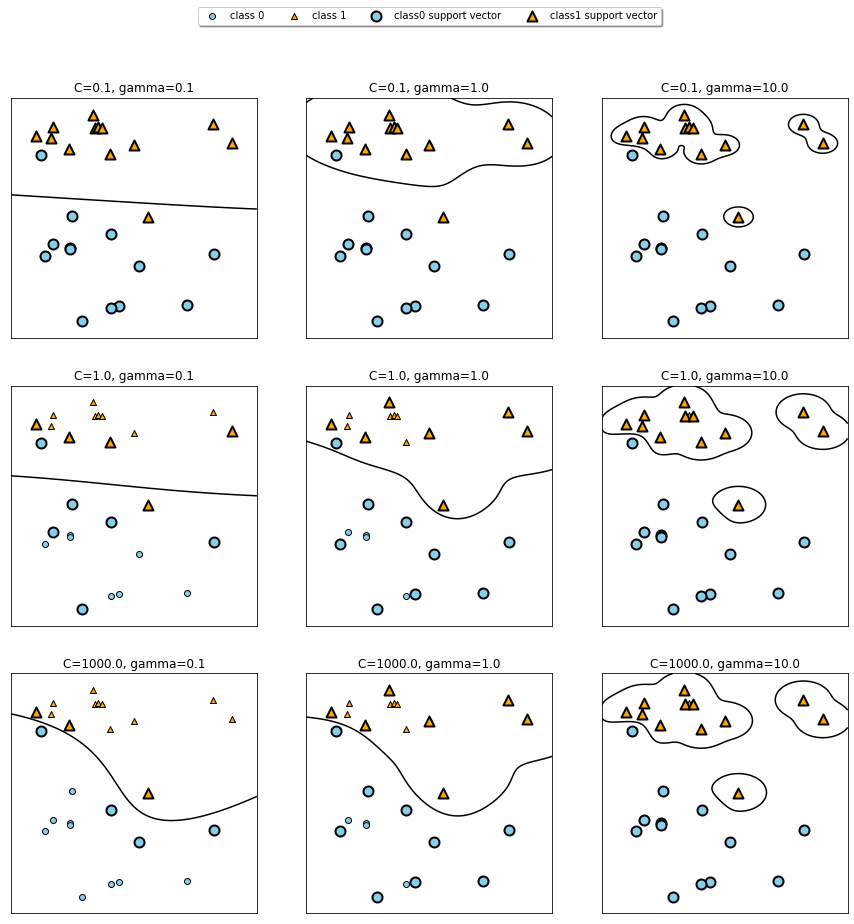

In [97]:
# SVM에서 모델의 복잡도를 제어하는 주요 파라미터는 gamma(kernel의 폭의 역수)
# gamma가 작을 수록 kernel의 폭이 넓어져 train 데이터의 영향 범위도 넓어짐
fig, axes = plt.subplots(3, 3, figsize=(15,15))

C_args = np.array([-1, 0, 3])
C_set = 10**C_args.astype(float)

gamma_args = np.arange(-1, 2)
gamma_set = 10**gamma_args.astype(float)

marker_set = ['o', '^']

for axe, C in zip(axes, C_set):
    for ax, gamma in zip(axe, gamma_set):
        params = {'C': C, 'gamma': gamma}
        
        
        
        svm = SVC(**params).fit(X, y)

        plot_2d_separator(svm, X, eps=0.5, ax=ax)
        ax.set_title('C={}, gamma={}'.format(C, gamma))

        color_set = ['skyblue', 'orange']
        for i, m, color in zip(np.unique(y), marker_set, color_set):
            ax.scatter(X[y==i][:, 0], X[y==i][:, 1], marker=m,
                       label='class {}'.format(i), c=color, edgecolors='k')
            
        
#         svm = SVC(**params).fit(X_train, y_train)
        
#         plot_2d_separator(svm, X_train, eps=0.5, ax=ax)
#         ax.set_title('C={}, gamma={}'.format(C, gamma))
        
#         color_set = ['skyblue', 'orange']
#         for i, m, color in zip(np.unique(y_train), marker_set, color_set):
#             ax.scatter(X_train[y_train==i][:, 0], X_train[y_train==i], marker=m,
#                        label='class{}'.format(i), c=color, edgecolors='k')
            
        sv = svm.support_vectors_
        idx = svm.dual_coef_.ravel() < 0
        idx_set = np.array([idx, ~idx])
        
        for i, idx, color, m in zip(np.unique(y), idx_set, color_set, marker_set):
            ax.scatter(sv[idx][:, 0], sv[idx][:, 1], marker=m,
                       c=color, label='class{} support vector'.format(i), s=100,
                       edgecolors='k', linewidths=2)
            
axes[0, 1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), fancybox=True, shadow=True, ncol=4)
plt.show()

In [99]:
# 왼쪽 그림의 결정 경계는 부드럽지만, 오른쪽 그림의 결정 경계는 데이터 포인트 하나에 민감
# gamma의 값이 클수록 모델의 복잡도가 증가
# C의 값이 작을수록 모델의 제약 증가 => 일반화 성능이 증가
# C의 값이 클수록 모델의 제약 감소 => 복잡도 증가

# C의 값을 크게 하여 규제를 완화할 수록 과소적합의 위험이 있다!!

In [100]:
# Feature auto-selection
# 지도학습의 유용한 특성 선택법
# 1. univariate statics(일변량 통계)
# 2. model-based selection(모델기반 선택)
# 3. iterative selection(반복적 선택)

In [101]:
# [[일변량 통계]]
# 1) 개개의 특성과 target 사이에 중요한 통계적 관계가 있는지 계산
# 2) 깊게 관련되어 있다고 판단되는 특성 선택

# 분산분석: 데이터를 클래스별로 나누어 평균을 비교하는 방법
# F-통계량이 높으면 그 특성은 클래스별 평균이 서로 다르다는 뜻
# 분류에서는 ANOVA 분석

# F-distibution
# 0. 기본적인 형태는 group(1) / group(2), 큰 값을 분자로 사용하여 최솟값을 1이 되게함
# 1. H0 = 클래스들의 평균과 분산이 같다
# 2. H0상태에서의 F-distribution 그래프를 그림
# 3. F-통계량이 1(좌측)에 가까운 수가 나올수록 두 집단은 비슷한 평균과 분산을 갖음
# 4. F-통계량이 1에 가까울수록 p-value의 값은 커짐 ==> target에 미치는 영향이 적다고 판단
# 5. p-value는 pvalues_에 저장됨
# 6. scikit-learn의 SelectBest, SelectPercentile에서 특성을 선택하는 기준은 F-통계값
# 7. F-통계값은 scores_에 저장됨

# => 각 특성이 독립적으로 평가됨 => 따라서 다른 특성과 깊게 연관된 특성은 선택되지 않을 것으로 예상됨

# 이 방법의 특징 [1] 계산이 매우 빠르고, 모델 필요 x, [2] 특성 선택 후 적용하려는 모델에 상관없이 사용 가능

# scikit-learn에서 적용
# 회귀 -> f_regression 사용, 분류 -> f_classif를 사용
# 계산한 p-value에 기초하여 특성 제거 방식 선택

# 이런 방식들은 매우 높은 p-value를 가진(target값과 연관성이 적은) 특성을 제외할 수 있도록 critical value를 조정하는 parameter를 사용

# critical value를 계산하는 방법중 하나인 SelectKBest는 고정된 k개의 특성을 선택하고 SelectPercentile은 지정된 비율만큼 특성을 선택

In [104]:
# Cancer data에서 단변량 분석하기
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [105]:
# preprocessing
rng = np.random.RandomState(seed=0)
noise = rng.normal(size=(cancer.data.shape[0], 50)) # normal 분포에서 cancer.data.shape[0] x 50의 데이터 추출

cancer_data_noise = np.hstack([cancer.data, noise])
print('cancer_data_noise.shape\n {}'.format(cancer_data_noise.shape))

cancer_data_noise.shape
 (569, 80)


In [107]:
# 테스트셋 분할
X_train, X_test, y_train, y_test = train_test_split(cancer_data_noise, cancer.target, test_size=0.2, random_state=0)

In [110]:
# preprocessing 메소드 호출 및 적용
select = SelectPercentile(percentile=50).fit(X_train, y_train) # percentile: 50%만 선택
X_train_select = select.transform(X_train)
X_test_selected = select.transform(X_test)

print('X_train.shape\n{}'.format(X_train.shape))
print('X_train_select.shape\n{}'.format(X_train_select.shape))

X_train.shape
(455, 80)
X_train_select.shape
(455, 40)


In [112]:
# 어떤 특성이 선택되었는지 확인
idx = select.get_support()
print('idx\n{}'.format(idx))

idx
[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False False False  True  True  True
  True False False False False  True False False False False False False
 False  True False False  True  True  True False  True False False  True
 False False False False False False False False  True False False False
 False  True False False False False False False]


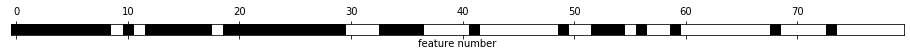

In [113]:
plt.matshow(idx.reshape(1, -1), cmap='gray_r')
plt.yticks([])
plt.xlabel('feature number')
plt.show()

In [116]:
# 전체 특성을 이용했을 때와 선택된 특성만 사용했을 때 로지스틱 회귀 성능 비교
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

print('전체 특성을 사용한 점수: \n{:.3f}'.format(lr.score(X_test, y_test)))

lr.fit(X_train_select, y_train)
print('선택된 특성을 사용한 점수 \n{:.3f}'.format(lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 
0.930
선택된 특성을 사용한 점수 
0.956


C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:


In [117]:
# [[모델기반 특성 선택]]
# 1) 특성의 중요도를 평가
# 2) 가장 중요한 특성들만 선택

# 특성 선택을 위한 모델은 각 특성의 중요도를 측정하여 순서를 매길 수 있어야 함
# -> decision tree는 각 특성의 중요도가 담겨있는 feature_importances_를 제공

# 일변량 분석과는 반대로 모델기반 특성 선택은 한 번에 모든 특성을 고려하므로 사용된 모델이 상호작용을 잡아낼 수 있다면 상호작용 부분을 반영할 수 있다.
# 일변량 분석보다 좋음

In [118]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

cancer = load_breast_cancer()

# noise(데이터 섞음)
rnd = np.random.RandomState(seed=0)
noise = rnd.normal(size=(cancer.data.shape[0], 70))

cancer_data_noise = np.hstack([cancer.data, noise])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(cancer_data_noise, cancer.target, random_state=0, test_size=0.2)

# 특성을 고를 모델 적용
randforest = RandomForestClassifier(n_estimators=100, random_state=0)
select_model = SelectFromModel(randforest, threshold='median').fit(X_train, y_train)

select_uni = SelectPercentile(percentile=50).fit(X_train, y_train)

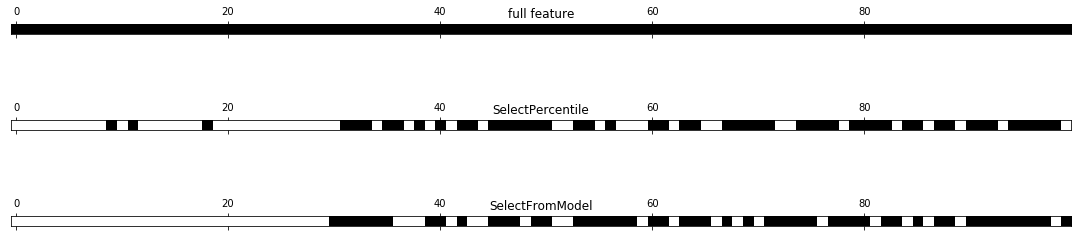

In [127]:
models = [select_uni, select_model]
_, axes = plt.subplots(3, 1, figsize=(19, 5))

ones = np.ones(X_train.shape[1], dtype=np.bool)
axes[0].matshow(ones.reshape(1, -1), cmap='gray')
axes[0].set_yticks([])
axes[0].set_title('full feature')

for model, ax in zip(models, [axes[1], axes[2]]):
    X_train_model = model.transform(X_train)
    X_test_model = model.transform(X_test)

    idx = model.get_support()
    ax.matshow(idx.reshape(1, -1), cmap='gray')
    ax.set_yticks([])
    ax.set_title('{}'.format(model.__class__.__name__))

plt.show()

In [132]:
# 각 모델별 특성의 정확도
ogreg = LogisticRegression().fit(X_train, y_train)
score = logreg.score(X_test, y_test)
print('total 특성의 정확도: {:.3f}'.format(score))

models = [select_uni, select_model]
names = ['univariate', 'model_based']

for model, name in zip(models, names):
    X_train_model = model.transform(X_train)
    X_test_model = model.transform(X_test)
    
    logreg = LogisticRegression().fit(X_train, y_train)
    score = logreg.score(X_test, y_test)
    print('{} 특성의 정확도: {:.3f}'.format(name, score))

total 특성의 정확도: 0.930
univariate 특성의 정확도: 0.930
model_based 특성의 정확도: 0.930


C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:


In [ ]:
# 이진 분류 평가
